## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

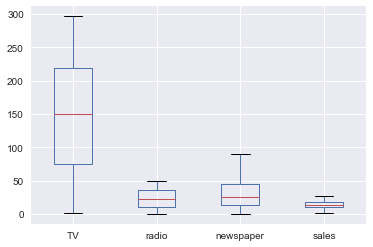

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

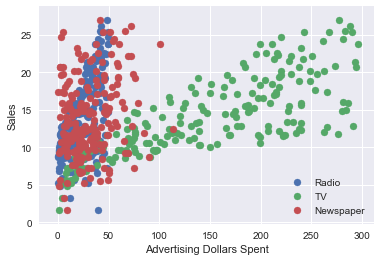

In [4]:
plt.scatter(df['radio'], df['sales'], label='Radio')
plt.scatter(df['TV'], df['sales'], label='TV')
plt.scatter(df['newspaper'], df['sales'], label='Newspaper')
plt.ylabel('Sales')
plt.xlabel('Advertising Dollars Spent')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b32e6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ba79d68>]], dtype=object)

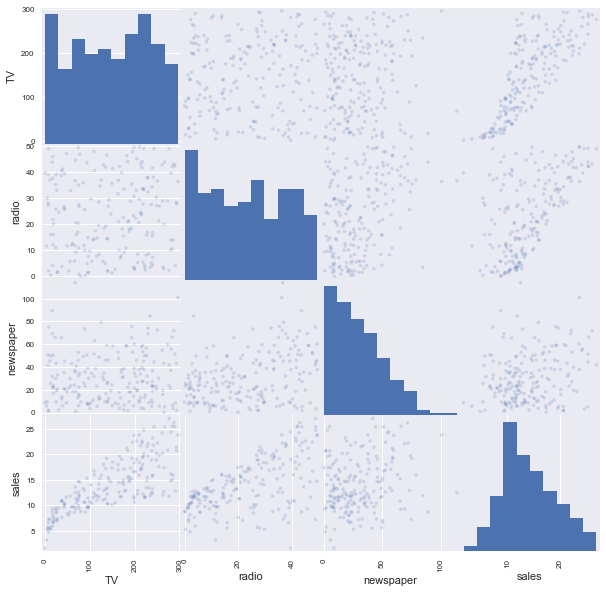

In [5]:
# Deprecated in pandas 3.6 from pandas.tools.plotting import scatter_matrix 
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2 ,figsize=(10,10))

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
X = df[['TV','radio', 'newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
# Split the data into training/testing sets
size = len(X)

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(len(y)*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [10]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
regr.score(X_test, y_test)

0.89547828792243878

### Answer 2e) 

This is a good R^2. This means that approximately, 89.5% of the variation in y can be explained by the variation in x. It is good because it is close to 1.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

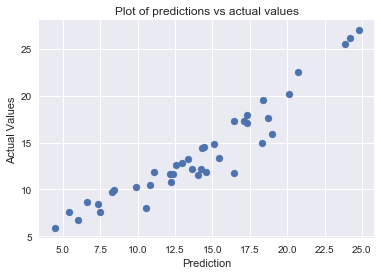

In [12]:
plt.title('Plot of predictions vs actual values')
plt.xlabel('Prediction')
plt.ylabel('Actual Values')
plt.scatter(regr.predict(X_test),y_test)
plt.show()

### Answer 2f)

Yes, it looks like a good model. Most of the points match up and are along y = x. However, the prediction sometimes is overppredicting. That is, it is predicting a higher value than the actual values sometimes. Nonetheless it is still a pretty good model.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [13]:
print('The Coefficients of the regression are: ' + str(regr.coef_))
X_test.head()

The Coefficients of the regression are: [ 0.0472521   0.179922   -0.00094408]


,TV,radio,newspaper
161,172.5,18.1,30.7
162,85.7,35.8,49.3
163,188.4,18.1,25.6
164,163.5,36.8,7.4
165,117.2,14.7,5.4


### Answer 2g)

We can see that the coefficient that has the greatest magnitude or that effects sales the most is .179922. This is the second variable which is radio.

We would need to check whether or not this coefficient is significant or not before we make conclusions.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

R^2 Value for regression without non-linear term is:  0.895405499602


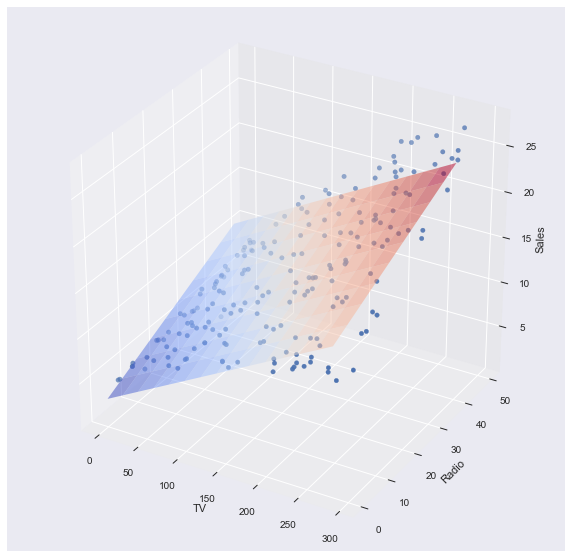

In [14]:
# Plot the data in 3 dimesnions without a non-linear term
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm

# Create new regression for only TV and Radio
y = df['sales']
x = df[['TV', 'radio']]

# Split the data into training/testing sets
size = len(X)
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]
y_train = y[0:int(len(y)*0.8)]
y_test = y[int(size*0.8):]

# fit the regression
regression = LinearRegression()
regression.fit(x_train, y_train)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

# Add in a bunch of points to the surface
x = np.arange(0, 300, 20)
y = np.arange(0, 50, 5)

x_mesh, y_mesh = np.meshgrid(x,y)

surface = pd.DataFrame({'TV': x_mesh.ravel(), 'radio': y_mesh.ravel()})
        
# Predict surface values
predictions = regression.predict(surface)


ax.scatter(df['TV'], df['radio'], df['sales'])
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

ax.plot_surface(x_mesh, y_mesh, predictions.reshape(x_mesh.shape), 
                cmap=plt.cm.coolwarm, rstride=1, cstride=1,
                alpha=.5)
print('R^2 Value for regression without non-linear term is: ', str(regression.score(x_test, y_test)))
plt.show()


R^2 Value for regression with non-linear term is:  0.985450121256


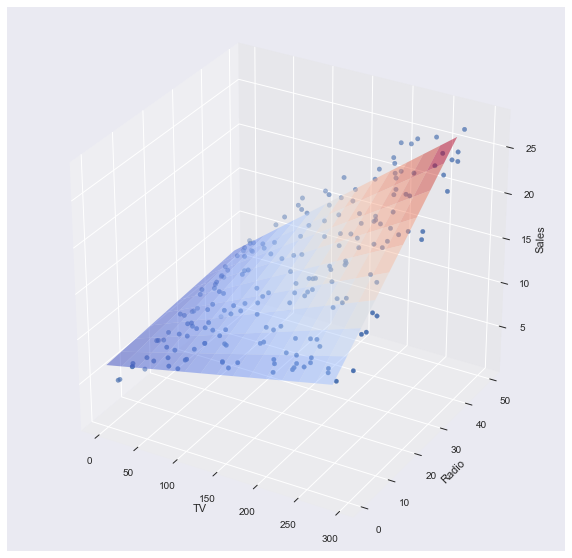

In [15]:
# Plot the data in 3 dimensions with a non-linear term TV * Radio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm

# Create new regression for only TV and Radio
y = df['sales']
df['TVxRADIO'] = df['TV'] * df['radio']
x = df[['TV', 'radio', 'TVxRADIO']]

# Split the data into training/testing sets
size = len(X)
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]
y_train = y[0:int(len(y)*0.8)]
y_test = y[int(size*0.8):]

# fit the regression
regression = LinearRegression()
regression.fit(x_train, y_train)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

# Add in a bunch of points to the surface
x = np.arange(0, 300, 20)
y = np.arange(0, 50, 5)

x_mesh, y_mesh = np.meshgrid(x,y)

surface = pd.DataFrame({'TV': x_mesh.ravel(), 'radio': y_mesh.ravel()})
surface['TVxRADIO'] = surface['TV'] * surface['radio']

# Predict surface values
predictions = regression.predict(surface)


ax.scatter(df['TV'], df['radio'], df['sales'])
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

ax.plot_surface(x_mesh, y_mesh, predictions.reshape(x_mesh.shape), 
                cmap=plt.cm.coolwarm, rstride=1, cstride=1,
                alpha=.5)
print('R^2 Value for regression with non-linear term is: ', str(regression.score(x_test, y_test)))
plt.show()

### Answer How Could We Improve Performance)

As we can see, the linear plane is not a great prediction. There are some terms not captured when 'TV' is large. Thus, adding an interactions term, TV * Radio gives us a better curve. When TV is large, those points are captured by the curve. Thus, in conclusion, adding another non-linear term captures the data a lot better than just using a simple regression with TV and Radio.

We use R^2 on the test data to validate out results. As we can see, adding the non-linear term improves $R^2$ by 10% which is really good. This is cross-validated with test data so we know it isn't overfitting.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


112.64705664288809

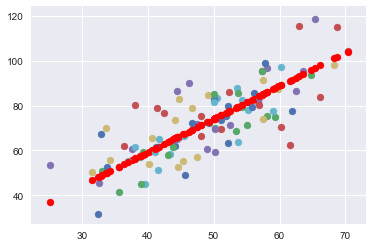

In [16]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate=.0001, doprint=True, doplot=True):
    points = genfromtxt("data.csv", delimiter=",")
    # learning_rate = 0.0001 defaulted above so I can change learning rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    if doprint:
        print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
        print("Running...")
        print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, error))
    if doplot:
        for i in range(0,len(points)):
            plt.scatter(points[i,0],points[i,1])
            plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    return error
        
run(100)

### Answer 3 part 1)
Question: By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all. Can you explain in words or math why this is?

Before we dive into the learning rate and convergence, let's review what gradient descent is even doing. Gradient descent is finding the optimal $\beta$ and $m$ using the following formulas:

$$\beta_{n+1} = \beta_n - \gamma \nabla F$$
$$m_{n+1} = m_n - \gamma \nabla F$$

Where $F$ is an error function and $\gamma$ is our step size. Esentially, we are finding the best $\beta$ and $m$ by minimizing our error function F.

Here's where choosing our step size ($\gamma$) is very important. If we choose a learning rate too large, then we skip over our local minimum and never reach it. If we choose a learning rate too small, it will be highly inefficient and will take forever to reach our local minimum. Below, I show 3 examples of a learning rate that is too small, too large, and just right.

### Convergence Rate vs. Learning Rate
This is demonstrated below using 5 iterations. As we can see from the frist graph, too small of a learning rate causes a slight increase in error. This is then zoomed in on the second graph. From the second graph, we get a clearer picture that after 5 iterations, too small of a learning rate gives a larger error. This is due to the inefficiency of smaller learning rates. Too large of a learning rate, as seen by the first graph, will not even converge and gives us a very large error. A good learning rate is somewhere between .0001 and .0003.

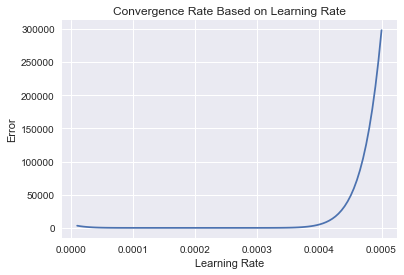

In [17]:
# Use this to visually discuss convergence rate based on learning rate
learning_list_1 = np.linspace(0.00001,.0005, 100)

error_list = []
for learning in learning_list_1:
    error_list.append(run(5, learning, doprint=False, doplot=False))

plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.title('Convergence Rate Based on Learning Rate')
plt.plot(learning_list_1, error_list)
plt.show()

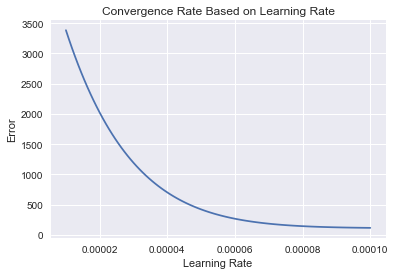

In [18]:
# Same as above zooming in on .00001 and .0001
learning_list_2 = np.linspace(0.00001,.0001, 100)
error_list = []
for learning in learning_list_2:
    error_list.append(run(5, learning, doprint=False, doplot=False))

plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.title('Convergence Rate Based on Learning Rate')
plt.plot(learning_list_2, error_list)
plt.show()

### Learning Rate too Large
Below is an example of a learning rate that doesn't converge. As you can see, it alternates from guessing too high to guessing to low. This is because the learning rate is too large and it is completely missing the minimum.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


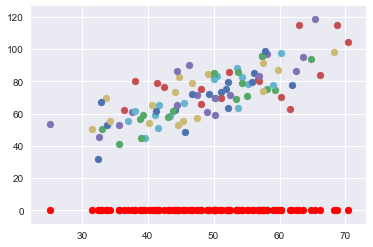

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 14.547010110737297, m = 737.0702973591052, error = 1348891833.1677659


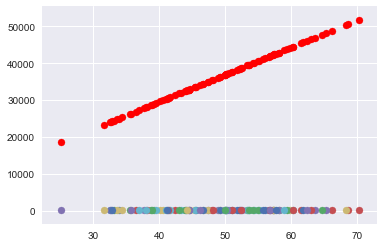

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -7190.96324165671, m = -365870.99977197684, error = 333704386442685.3


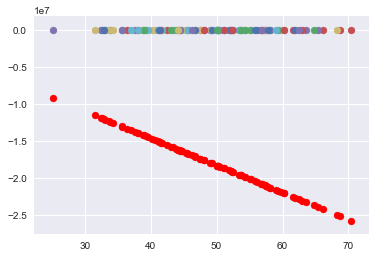

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 3576749.2439604965, m = 181979369.72567248, error = 8.255563870267744e+19


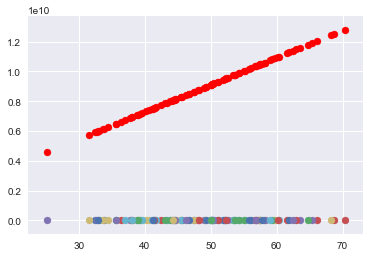

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -1779020210.4555883, m = -90513751675.3458, error = 2.04235657620877e+25


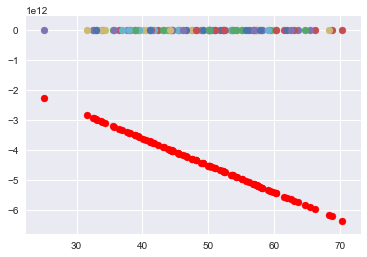

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 884857416143.8566, m = 45020154325111.125, error = 5.052617180282238e+30


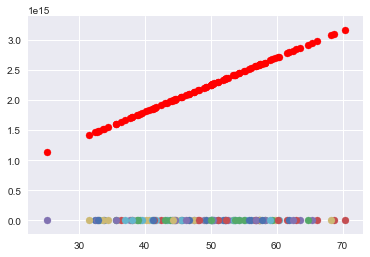

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -440114531687248.1, m = -2.239233550602833e+16, error = 1.2499746943245637e+36


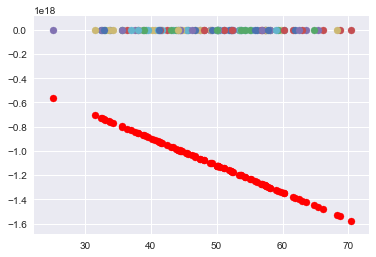

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 2.1890622993983712e+17, m = 1.113760485567407e+19, error = 3.0923315198886922e+41


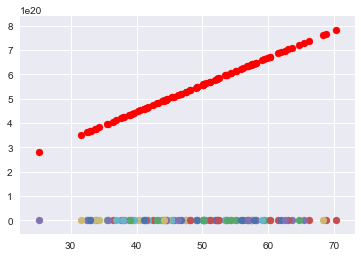

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1.0888060733365071e+20, m = -5.539674139293758e+21, error = 7.650166257217153e+46


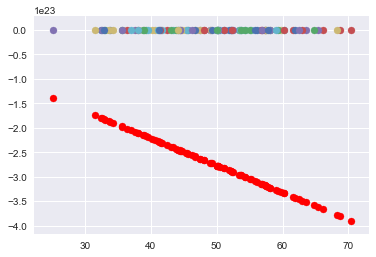

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 5.415554713359584e+22, m = 2.75534910487743e+24, error = 1.8925863345069334e+52


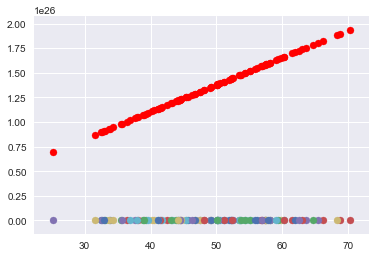

In [19]:
# Here is an example of a learning rate that is too large so never converges
for num in range(0,10):
   run(num, .1)
   plt.show()

### Learning Rate too small
Below is an example of a learning rate too small. As we can tell from the graphs, the regression line is slowly getting better and better but it will take a lot of iterations to eventually reach it.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


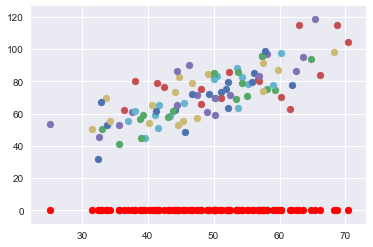

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


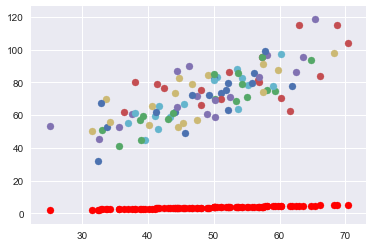

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


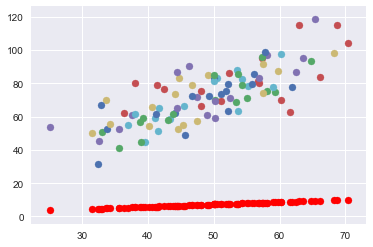

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


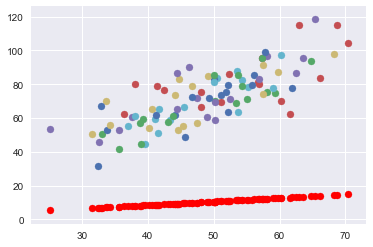

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


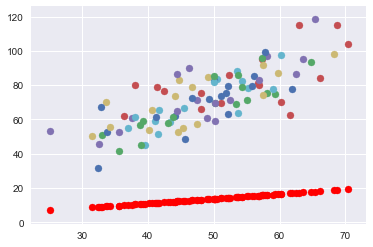

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


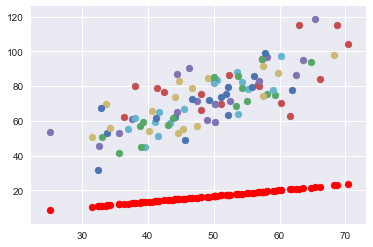

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


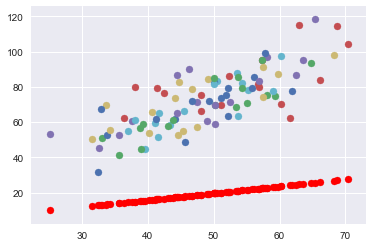

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


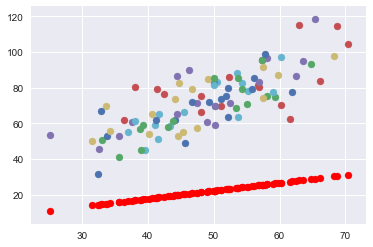

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


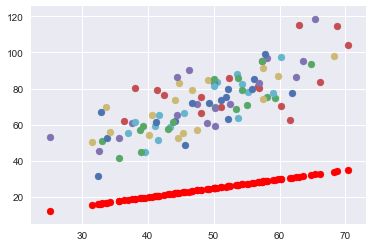

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


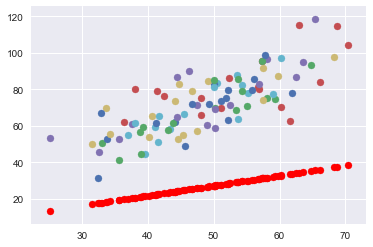

In [20]:
# Here is an example of a learning rate that is too small so it takes forever to converge
for num in range(0,10):
   run(num, .00001)
   plt.show()

### Learning Rate just right
Below is a good learning rate that is not too small nor too large. Thus, we converge to the minimum error in less than 10 iterations whereas the learning rate that was too small doesn't converge in 10 iterations.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


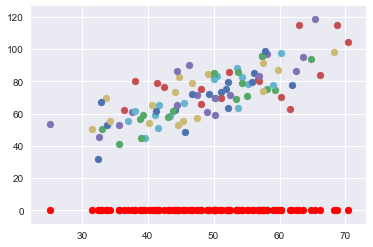

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


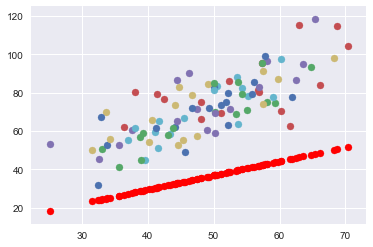

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


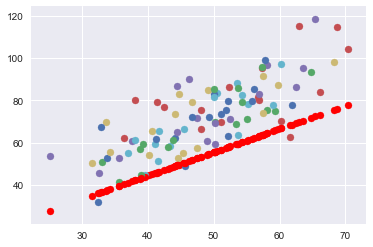

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


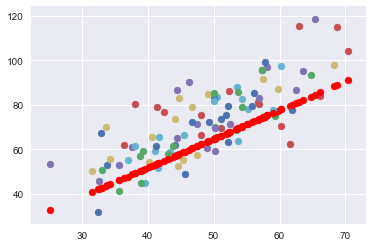

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


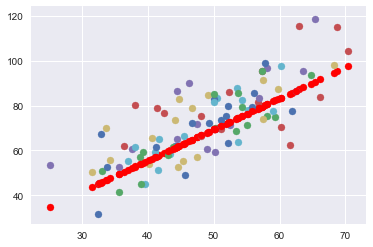

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


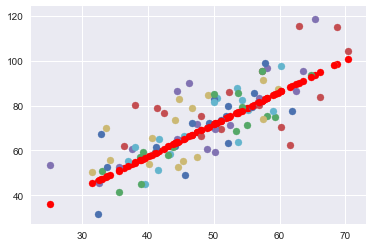

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


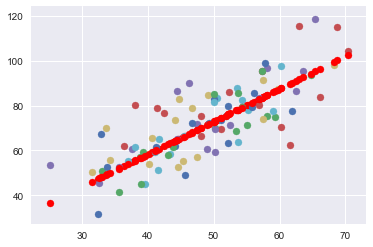

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


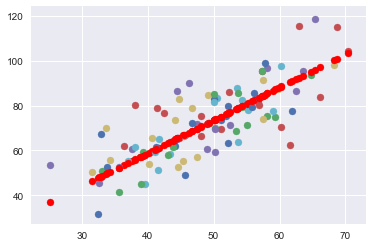

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


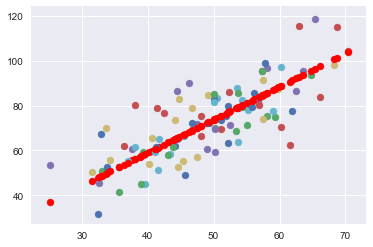

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


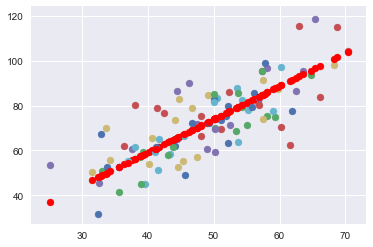

In [21]:
for num in range(0,10):
   run(num, .0001)
   plt.show()

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

### Answer Problem 3 Part 2)

I will do the same below and choose 3 learning rates. 1 that is too large, 1 that is too small, and 1 that converges at a reasonable rate.

### Learning Rate too Large
Here, we can see that the error never converges. The reason for such a high spike towards the end is that each error term is that much larger than the next. Thus, once we plot the error term for 100 iterations, it seems to spike at the end. Thus, we can use a log-log plot to show its increase and to get a smoother curve.

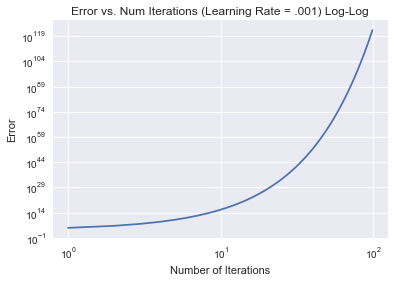

In [22]:
iterations_list = np.arange(1,100)
error_list = []
for num in iterations_list:
    error_list.append(run(num, .001, doprint=False, doplot=False))
    
plt.loglog(iterations_list,error_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs. Num Iterations (Learning Rate = .001) Log-Log')

### Learning Rate too Small

Here, we use a learning rate that is too small. We see that eventaully, the error term does converge but it takes up to 80 iterations to converge. We can compare this to a good learning rate that converges in less than 10 iterations.

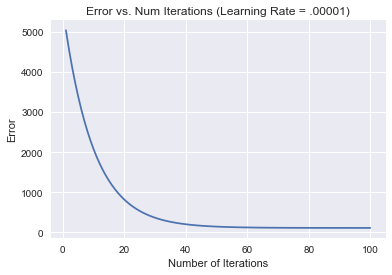

In [23]:
iterations_list = np.arange(1,101)
error_list = []
for num in iterations_list:
    error_list.append(run(num, .00001, doprint=False, doplot=False))
    

plt.plot(iterations_list,error_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs. Num Iterations (Learning Rate = .00001)')

### Learning Rate Just Right

Here, we see a learning rate that converges much faster than the previous one whos learning rate was too small. It also does converge unlike the learning rate that is too large which never converges. We see that this learning rate converges in just 5 or 6 iterations.

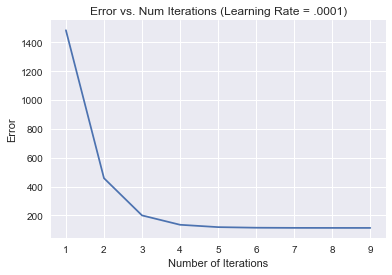

In [24]:
iterations_list = np.arange(1,10)
error_list = []
for num in iterations_list:
    error_list.append(run(num, .0001, doprint=False, doplot=False))
    
plt.plot(iterations_list,error_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs. Num Iterations (Learning Rate = .0001)')